# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Mixed Beverages Dataset

In [3]:
mbd=pd.read_csv(r"C:\Users\al33m\Downloads\Mixed_Beverage_Gross_Receipts.csv")

In [4]:
mbd.head()

,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Location Number,Location Name,Location Address,...,Inside/Outside City Limits,TABC Permit Number,Responsibility Begin Date,Responsibility End Date,Obligation End Date,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,32047970895,HONDURAS MAYA CAFE & BAR LLC,8011 HAZEN ST,HOUSTON,TX,77036.0,101,1,HONDURAS MAYA CAFE & BAR LLC,5945 BELLAIRE BLVD STE B,...,Y,MB817033,08/16/2012,09/12/2019,07/31/2019,0,0,0,0,0
1,32049923835,"MERMAID KARAOKE PRIVATE CLUB, INC.",2639 WALNUT HILL LN STE 225,DALLAS,TX,75229.0,57,1,MERMAID KARAOKE PRIVATE CLUB,1310 W CAMPBELL RD STE 103,...,Y,N 837378,04/12/2013,07/01/2015,08/31/2014,480,185,1374,0,2039
2,32034036304,FENG KAI CORPORATION,8427 BOULEVARD 26,N RICHLND HLS,TX,76180.0,220,1,JAPANESE GRILL,8427 BOULEVARD 26,...,Y,MB576670,05/01/2008,03/17/2018,06/30/2016,1143,167,669,0,1979
3,14537211071,"THE HUTTO SMITHS, LLC",429 LITTLE LAKE RD,HUTTO,TX,78634.0,246,1,THE DOWNTOWN HALL OF FAME,205 EAST ST,...,Y,MB791778,12/06/2011,NaN,03/31/2018,12881,357,10447,0,23685
4,32019999229,"THE CROSSING AT FIDDLE CREEK, INC.",1620 W CEDAR ST,STEPHENVILLE,TX,76401.0,72,1,THE CROSSING AT FIDDLE CREEK INC,2004 W SWAN ST,...,Y,N 643163,10/26/2006,11/30/2013,08/31/2008,4841,2413,4620,0,11874


# Data Cleaning

https://github.com/austinpracticaldatascience/texas_beer/blob/joebryan/mixed_receipts_joebryan.ipynb

In [6]:
def timestamp(mbd,col):
    
    # convert to datetime
    mbd[col] = pd.to_datetime(mbd[col])

    # Updated info
    print(mbd.info())
    
timestamp(mbd,"Responsibility Begin Date")
timestamp(mbd,"Responsibility End Date")
timestamp(mbd,"Obligation End Date")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842120 entries, 0 to 2842119
Data columns (total 24 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Taxpayer Number             int64         
 1   Taxpayer Name               object        
 2   Taxpayer Address            object        
 3   Taxpayer City               object        
 4   Taxpayer State              object        
 5   Taxpayer Zip                float64       
 6   Taxpayer County             int64         
 7   Location Number             int64         
 8   Location Name               object        
 9   Location Address            object        
 10  Location City               object        
 11  Location State              object        
 12  Location Zip                int64         
 13  Location County             int64         
 14  Inside/Outside City Limits  object        
 15  TABC Permit Number          object        
 16  Responsibility Beg

In [7]:
mbd = mbd.sort_values(by=['Obligation End Date'])
mbd.tail(4)

,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Location Number,Location Name,Location Address,...,Inside/Outside City Limits,TABC Permit Number,Responsibility Begin Date,Responsibility End Date,Obligation End Date,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
2838862,32071460821,"THE ULTIMATE KITCHEN, LLC",3353 AIRPORT BLVD,HOUSTON,TX,77051.0,101,2,THE ULTIMATE KITCHEN,4529 OLD SPANISH TRL STE C,...,Y,MB200034595,2022-03-09,NaT,2022-10-31,0,0,0,0,0
2825207,32080631933,OUTPOST 9167 LLC,3948 LEGACY DR STE 106,PLANO,TX,75023.0,43,1,OUTPOST 9167 LLC,601 N 4TH ST,...,Y,MB200037953,2021-11-08,NaT,2022-10-31,0,0,0,0,0
2839564,32078749663,CODE 3 BAR LLC,801 MADISON ST,CARRIZO SPGS,TX,78834.0,64,1,CODE 3 BAR LLC,109C N 1ST ST,...,Y,MB1127103,2021-08-05,NaT,2022-10-31,1505,0,1360,0,2865
2818414,32077154808,"LEE 3 INVESTMENTS, LLC",8510 GALEANA TRACE CV,AUSTIN,TX,78733.0,227,1,LEE'S KITCHEN & COCKTAILS,701 S CAPITAL OF TEXAS HWY STE G700,...,Y,MB1129168,2021-08-23,NaT,2022-10-31,0,0,0,0,0


# Austin Data

In [11]:
# Focus on Austin
mbd_aus = mbd[mbd['Taxpayer County'] == 227]

In [12]:
mbd_aus.head()

,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Location Number,Location Name,Location Address,...,Inside/Outside City Limits,TABC Permit Number,Responsibility Begin Date,Responsibility End Date,Obligation End Date,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
2567053,13715101047,SONG DONG KIM,3924 LICORICE LN,AUSTIN,TX,78728.0,227,2,SHILLA RESTAURANT,6406 N INTERSTATE 35 STE 2343,...,Y,MB609415,2005-09-27,2012-09-12,2007-01-31,587,113,416,0,1116
2047190,17417128273,"G.M.C. INVESTMENT, INC.",12207 TANGLEWILD DR,AUSTIN,TX,78758.0,227,6,EGO'S,510 S CONGRESS AVE,...,Y,MB184470,1993-12-01,NaT,2007-01-31,17886,318,13433,0,31637
606479,17427862390,"THREADGILL'S WORLD HEADQUARTERS, LTD.",6416 N LAMAR BLVD,AUSTIN,TX,78752.0,227,1,THREADGILL'S,301 W RIVERSIDE DR,...,Y,MB401433,1996-10-09,2019-10-11,2007-01-31,10598,2776,10438,0,23812
2567082,17429784212,"MY/ZP OF ROUND ROCK, LTD.",1623 TOOMEY RD,AUSTIN,TX,78704.0,227,2,CHUY'S OF ROUND ROCK,2320 IH 35 NORTH,...,Y,MB493286,2001-05-21,2007-02-13,2007-01-31,53478,922,17861,0,72261
605733,32010520990,FATIMA ROBLES,4327 S 1ST ST STE 102,AUSTIN,TX,78745.0,227,3,CASA MARIA MEXICAN RESTAURANT,706 S GUADALUPE ST,...,Y,MB572412,2005-03-15,2019-10-17,2007-01-31,2400,10,3657,0,6067


## Questions 
- which zipcode has the most venues?


In [25]:
mbd_aus['Taxpayer Zip'].astype(int)

2567053    78728
2047190    78758
606479     78752
2567082    78704
605733     78745
           ...  
2828910    78660
2789857    78731
2783162    78721
2837108    78731
2818414    78733
Name: Taxpayer Zip, Length: 174445, dtype: int32

<AxesSubplot:>

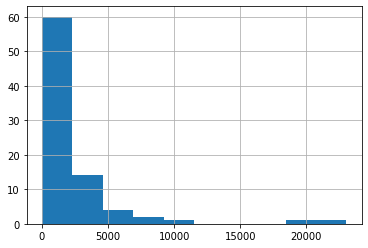

In [41]:
mbd_aus['Taxpayer Zip'].value_counts().hist()

Top 10 zipcodes with the most amount of venues

In [42]:
mbd_aus['Taxpayer Zip'].value_counts().head(10)

78704    23040
78701    20193
78734    10278
78702     8447
78703     7093
78723     6734
78748     5980
78746     5545
78759     4644
78758     4152
Name: Taxpayer Zip, dtype: int64

- Which zipcode in Austin sells the most amount of beer?

In [43]:
mbd_aus_zip=mbd_aus.groupby('Taxpayer Zip').agg('sum')

In [44]:
mbd_aus_zip['Liquor %']=mbd_aus_zip['Liquor Receipts'] / mbd_aus_zip['Total Receipts']

In [45]:
mbd_aus_zip['Beer %']=mbd_aus_zip['Beer Receipts'] / mbd_aus_zip['Total Receipts']

In [46]:
mbd_aus_zip['Wine %']=mbd_aus_zip['Wine Receipts'] / mbd_aus_zip['Total Receipts']

In [83]:
mbd_aus_zip['zipcode']=mbd_aus_zip.index

In [ ]:
mbd_aus_zip['zipcode']=mbd_aus_zip['zipcode'].map(str)

In [84]:
mbd_aus_zip.head(4)

,Taxpayer Number,Taxpayer County,Location Number,Location Zip,Location County,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts,Liquor %,Beer %,Wine %,zipcode
Taxpayer Zip,,,,,,,,,,,,,,
75120,3877863699446,27467,242,9089399,8470,791625,211135,2706888,0,3709648,0.213396,0.729689,0.056915,75120
77565,1443072404745,10215,48,3490524,3831,438007,4805,181473,0,624285,0.701614,0.290689,0.007697,77565
78610,169231681710,3178,14,1102416,3178,8373,0,9021,0,17394,0.481373,0.518627,0.000000,78610
78611,577367320842,4086,18,1414998,486,72931,3662,75038,0,151631,0.480977,0.494872,0.024151,78611


The top 10 zipcodes with greatest % of beer reciepts

In [50]:
mbd_aus_zip.sort_values(ascending=False, by='Beer %').head(10)

,Taxpayer Number,Taxpayer County,Location Number,Location Zip,Location County,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts,Liquor %,Beer %,Wine %
Taxpayer Zip,,,,,,,,,,,,,
78615,1346405421984,9534,42,3301830,9534,7334,154,23144,0,30632,0.239423,0.755550,0.005027
75120,3877863699446,27467,242,9089399,8470,791625,211135,2706888,0,3709648,0.213396,0.729689,0.056915
78630,180033645615,3405,30,1180515,3405,19996,0,37464,0,57460,0.347999,0.652001,0.000000
78762,18219239947743,147550,1347,50700176,62941,7682951,1032916,15772488,0,24488355,0.313739,0.644081,0.042180
78713,11395557113413,90573,78688,31331846,90363,757151,471133,1591230,142,2819656,0.268526,0.564335,0.167089
78753,73315794298692,626747,3405,216869607,597670,29600601,1530057,36666709,68087,68646219,0.431205,0.534140,0.022289
78664,13405842596904,118494,694,41089076,120850,21801709,884480,24801798,0,47487987,0.459099,0.522275,0.018625
78610,169231681710,3178,14,1102416,3178,8373,0,9021,0,17394,0.481373,0.518627,0.000000
78714,1986912375398,29283,130,10106342,12535,197927,15132,284975,0,561935,0.352224,0.507132,0.026928


In [52]:
mbd_aus_zip.loc[78704]

Taxpayer Number          4.790850e+14
Taxpayer County          5.230080e+06
Location Number          1.140440e+05
Location Zip             1.800085e+09
Location County          4.252173e+06
Liquor Receipts          8.543272e+08
Wine Receipts            1.154473e+08
Beer Receipts            4.540616e+08
Cover Charge Receipts    2.743750e+05
Total Receipts           1.424885e+09
Liquor %                 5.995763e-01
Beer %                   3.186655e-01
Wine %                   8.102217e-02
Name: 78704, dtype: float64

In [63]:
topZipcodesDF=pd.DataFrame({'Most Venues':mbd_aus['Taxpayer Zip'].value_counts().head(10).index,
             'Most Beer %': mbd_aus_zip.sort_values(ascending=False, by='Beer %').head(10).index,
             'Most Wine %': mbd_aus_zip.sort_values(ascending=False, by='Wine %').head(10).index,
             'Most Liquor %': mbd_aus_zip.sort_values(ascending=False, by='Liquor %').head(10).index,
            'Most Reciepts': mbd_aus_zip.sort_values(ascending=False, by='Total Receipts').head(10).index})

In [64]:
topZipcodesDF

,Most Venues,Most Beer %,Most Wine %,Most Liquor %,Most Reciepts
0,78704,78615,79843,78764,78701
1,78701,75120,78716,78724,78704
2,78734,78630,78734,78621,78703
3,78702,78762,78735,78768,78702
4,78703,78713,78730,78761,78734
5,78723,78753,78765,77565,78758
6,78748,78664,78726,78725,78746
7,78746,78610,78709,78676,78748
8,78759,78714,78731,78766,78768
9,78758,78611,78746,78733,78759


# Map Viz

https://data.austintexas.gov/dataset/Boundaries-Zip-Code-Tabulation-Areas-2017/nf4y-c7ue

In [89]:
import folium
import json
import geopandas as gpd
from folium.features import GeoJsonTooltip

In [119]:
aus_json=gpd.read_file(r"C:\Users\al33m\Downloads\tx_texas_zip_codes_geo.min.json")

In [121]:
aus_json.head(3)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,48,75801,4875801,B5,G6350,S,555807428,6484251,+31.7345202,-095.5313809,N,"POLYGON ((-95.68072 31.72800, -95.68085 31.728..."
1,48,75839,4875839,B5,G6350,S,381863557,3928555,+31.6066930,-095.5833403,N,"POLYGON ((-95.66269 31.64586, -95.66242 31.645..."
2,48,78336,4878336,B5,G6350,S,126923194,31624523,+27.9269126,-097.1777757,N,"POLYGON ((-97.19642 27.91194, -97.19618 27.912..."


In [122]:
aus_json=aus_json[['ZCTA5CE10','geometry']]
aus_json.columns=['zipcode','geometry']

In [124]:
aus_final=aus_json.merge(mbd_aus_zip,on='zipcode',how='right')

In [125]:
aus_final.sort_values(ascending=False, by='Beer %').head(10)

,zipcode,geometry,Taxpayer Number,Taxpayer County,Location Number,Location Zip,Location County,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts,Liquor %,Beer %,Wine %
5,78615,"POLYGON ((-97.49672 30.43401, -97.49581 30.435...",1346405421984,9534,42,3301830,9534,7334,154,23144,0,30632,0.239423,0.755550,0.005027
0,75120,None,3877863699446,27467,242,9089399,8470,791625,211135,2706888,0,3709648,0.213396,0.729689,0.056915
9,78630,None,180033645615,3405,30,1180515,3405,19996,0,37464,0,57460,0.347999,0.652001,0.000000
75,78762,None,18219239947743,147550,1347,50700176,62941,7682951,1032916,15772488,0,24488355,0.313739,0.644081,0.042180
30,78713,None,11395557113413,90573,78688,31331846,90363,757151,471133,1591230,142,2819656,0.268526,0.564335,0.167089
66,78753,"POLYGON ((-97.65874 30.41818, -97.65858 30.418...",73315794298692,626747,3405,216869607,597670,29600601,1530057,36666709,68087,68646219,0.431205,0.534140,0.022289
17,78664,"POLYGON ((-97.63353 30.49641, -97.63345 30.496...",13405842596904,118494,694,41089076,120850,21801709,884480,24801798,0,47487987,0.459099,0.522275,0.018625
2,78610,"POLYGON ((-97.95090 30.11377, -97.95002 30.113...",169231681710,3178,14,1102416,3178,8373,0,9021,0,17394,0.481373,0.518627,0.000000
31,78714,None,1986912375398,29283,130,10106342,12535,197927,15132,284975,0,561935,0.352224,0.507132,0.026928
3,78611,"POLYGON ((-98.31408 30.68080, -98.31429 30.680...",577367320842,4086,18,1414998,486,72931,3662,75038,0,151631,0.480977,0.494872,0.024151


In [134]:
beermap = folium.Map(location=[30.2729, -97.7444], default_zoom_start=15)

In [ ]:
folium.Choropleth(
            geo_data=r"C:\Users\al33m\Downloads\tx_texas_zip_codes_geo.min.json",
            data=aus_final,
            columns=['zipcode', 'Beer %'],  
            key_on='feature.properties.ZCTA5CE10', #Here we grab the geometries/county boundaries from the geojson file using the key 
            fill_color='YlOrRd',
            nan_fill_color="White", #Use white color if there is no data available for the county
            fill_opacity=0.7,
            line_opacity=0.2,
            highlight=True,
            legend_name='Beer Reciepts %',
            line_color='black').add_to(beermap) 

In [ ]:
beermap

In [130]:
winemap = folium.Map(location=[30.2729, -97.7444], default_zoom_start=15)

In [ ]:
folium.Choropleth(
            geo_data=r"C:\Users\al33m\Downloads\tx_texas_zip_codes_geo.min.json",
            data=aus_final,
            columns=['zipcode', 'Wine %'],  
            key_on='feature.properties.ZCTA5CE10', #Here we grab the geometries/county boundaries from the geojson file using the key 
            fill_color='YlOrRd',
            nan_fill_color="White", #Use white color if there is no data available for the county
            fill_opacity=0.7,
            line_opacity=0.2,
            highlight=True,
            legend_name='Wine Reciepts %',
            line_color='black').add_to(winemap) 